In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import viz

COLORS, PAGE_WIDTH, ROW_HEIGHT = viz.set_plots()


#rolling mean in numpy:

def rolling_mean(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


In [4]:
prices = pd.read_csv("../data/prices.csv", index_col=0, parse_dates=True)
prices2023 = prices.loc[
        f"2023-01-01" :f"2023-01-31"
    ].lmp

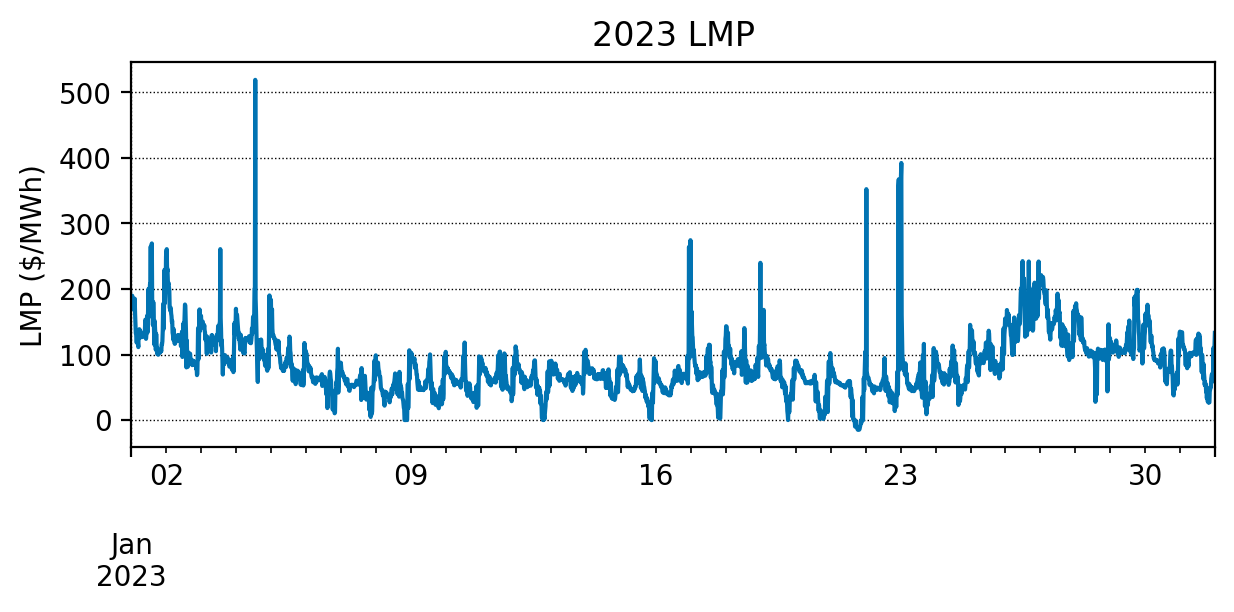

In [5]:
f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
prices2023.plot(ax=ax)
ax.set_title("2023 LMP")
ax.set_ylabel("LMP ($/MWh)")
plt.show()

In [6]:
from dqnRun import main as dqnMain

dqnMain(nYears=None, nMonths = 40, nDays=None, month= [1], test = 1)

100%|██████████| 119036/119036 [13:50<00:00, 143.29it/s]


0
Profit: 12046.685561157276
Mean profit: 12046.685561157276


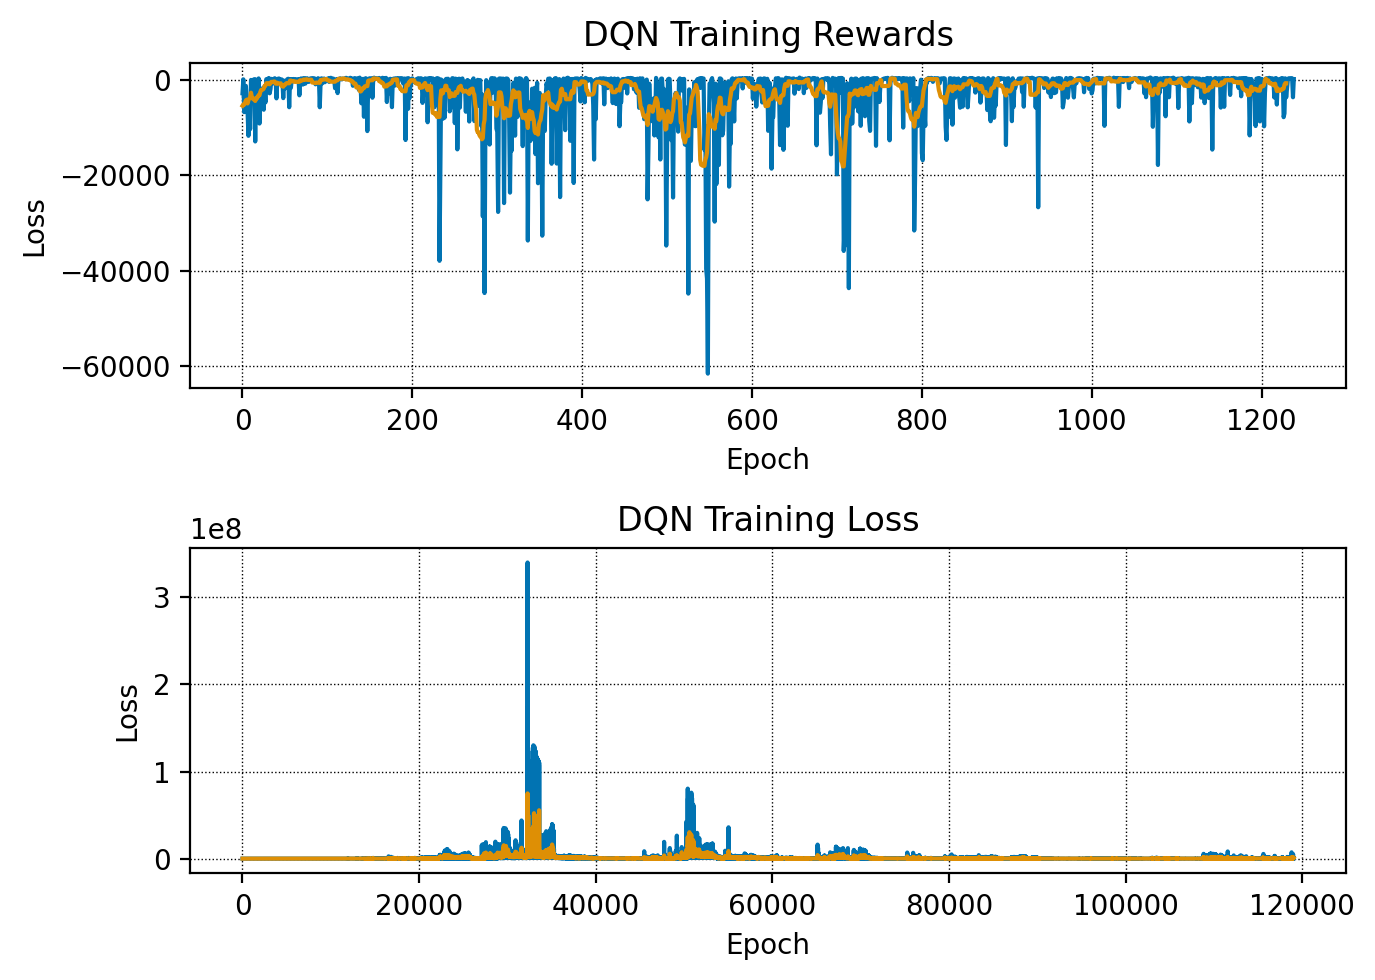

In [7]:
losses, rewards = np.load("DQNResults/dqn_losses.npy"), np.load("DQNResults/dqn_rewards.npy")
f, ax = plt.subplots(2, 1, figsize=(PAGE_WIDTH, 2*ROW_HEIGHT))
ax[0].plot(rewards[:], label="Reward")
ax[0].plot(rolling_mean(rewards, 10)[:], label="Rolling Mean")
ax[0].set_title("DQN Training Rewards")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

ax[1].plot(losses[:], label="Loss")
ax[1].plot(rolling_mean(losses, 10)[:], label="Rolling Mean")
ax[1].set_title("DQN Training Loss")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")

plt.tight_layout()
plt.savefig("DQNResults/dqn_rewards.png")
plt.show()

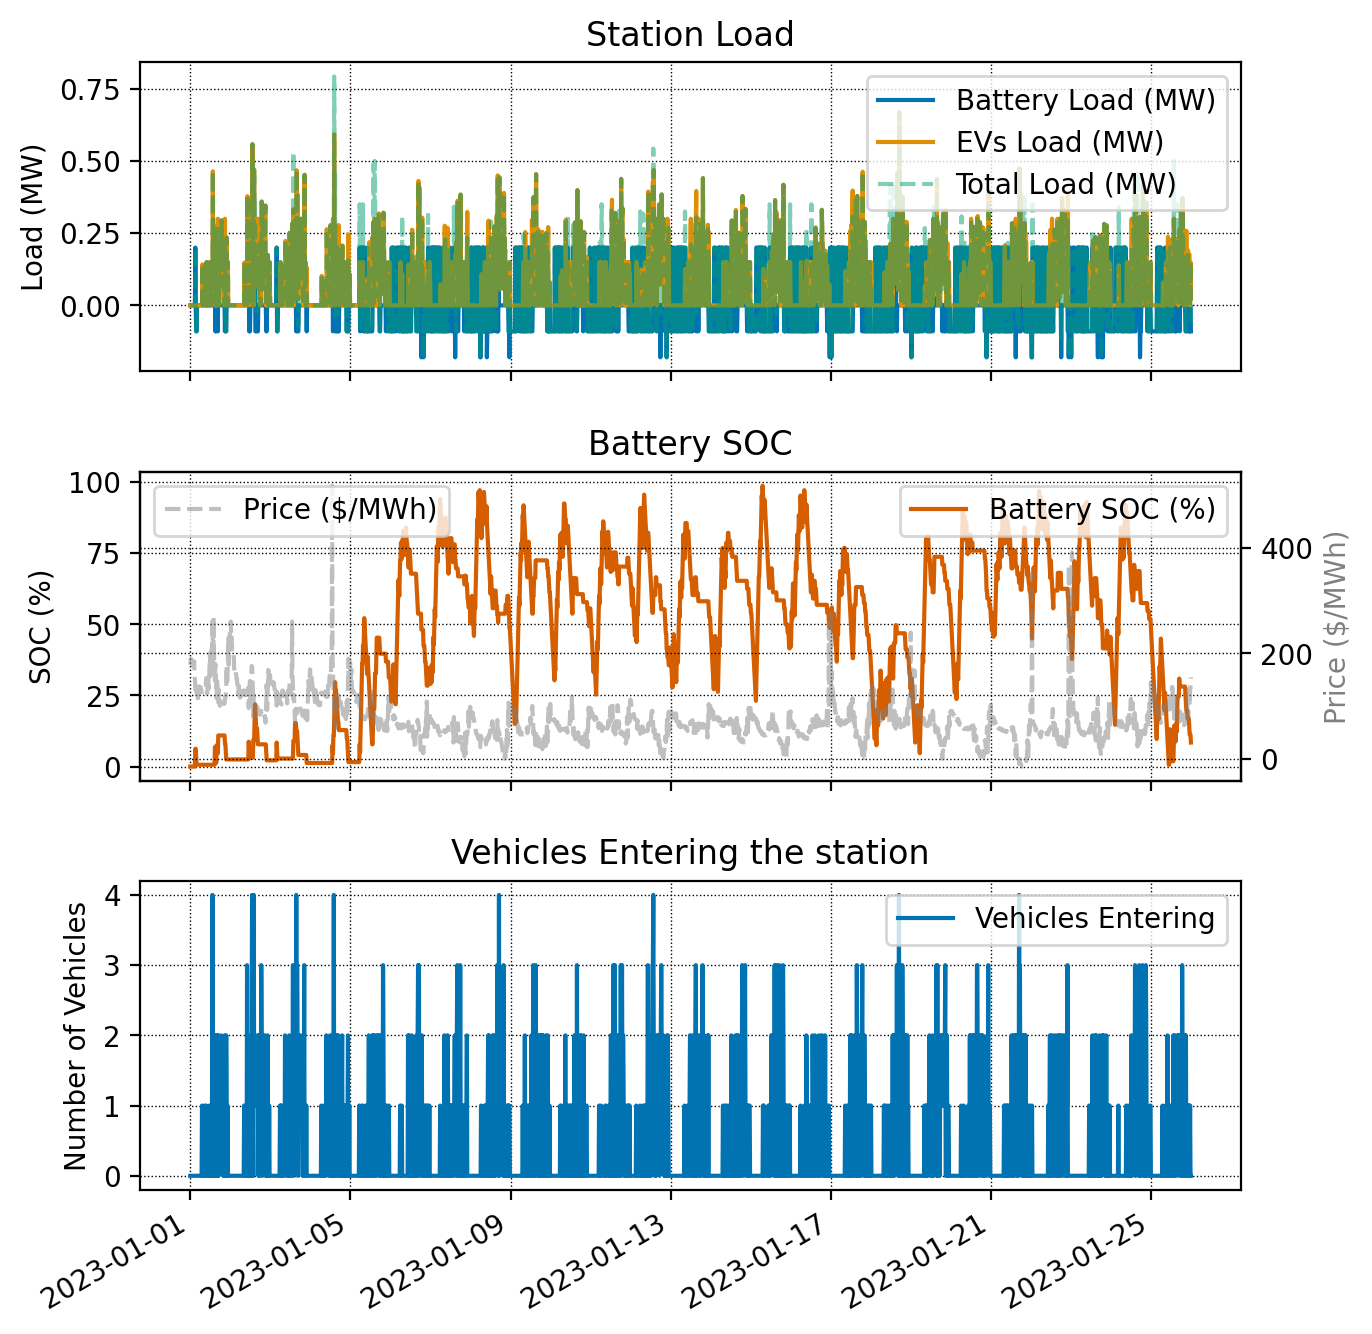

In [8]:
history = pd.read_csv("DQNResults/dqn_history.csv", index_col=0, parse_dates=True)

START, END = "2023-01-01", "2023-01-25"

viz.plotOperations(history, START, END, save_path="DQNResults/policy.png")

In [9]:
history

,time,SOC,load,load Batt,load EVs,cost,reward,rewardTrain,newEVs,price,invalidAction
2023-01-01 00:00:00+00:00,93,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,-1000.000000,0,178.25868,True
2023-01-01 00:15:00+00:00,94,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,-1000.000000,0,189.68090,True
2023-01-01 00:30:00+00:00,95,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,-1000.000000,0,189.77493,True
2023-01-01 00:45:00+00:00,96,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,-1000.000000,0,187.67822,True
2023-01-01 01:00:00+00:00,1,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,-1000.000000,0,179.11215,True
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 22:45:00+00:00,88,0.362500,-0.090000,-0.09,0.000000,-2.478150,2.478150,2.478150,1,110.14000,False
2023-01-31 23:00:00+00:00,89,0.362500,0.150000,0.00,0.150000,2.969453,8.280548,8.280548,0,79.18540,False
2023-01-31 23:15:00+00:00,90,0.334375,-0.043329,-0.09,0.046671,-1.027936,4.528227,4.528227,0,94.89488,False
2023-01-31 23:30:00+00:00,91,0.334375,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0,114.32974,False


In [10]:
history.invalidAction.sum() 

577

In [12]:
from DQNPolicy import DQNPolicy
from tqdm import tqdm
rewards = []
max_power = []
for _ in tqdm(range(1)):
    policy = DQNPolicy([], pricesTest=prices2023, network_dict="DQNResults/dqn_model.pth")
    history = policy.run(prices2023)
    rewards.append(history.reward.sum())
    max_power.append(history.load.max())
    # print(history.reward.sum())

print("Reward Metrics: ", np.mean(rewards), "$")
print("Max Power Metrics: ", np.mean(max_power), "MW")


100%|██████████| 1/1 [00:02<00:00,  2.86s/it]

Reward Metrics:  11757.11076826549 $
Max Power Metrics:  0.555466535654557 MW


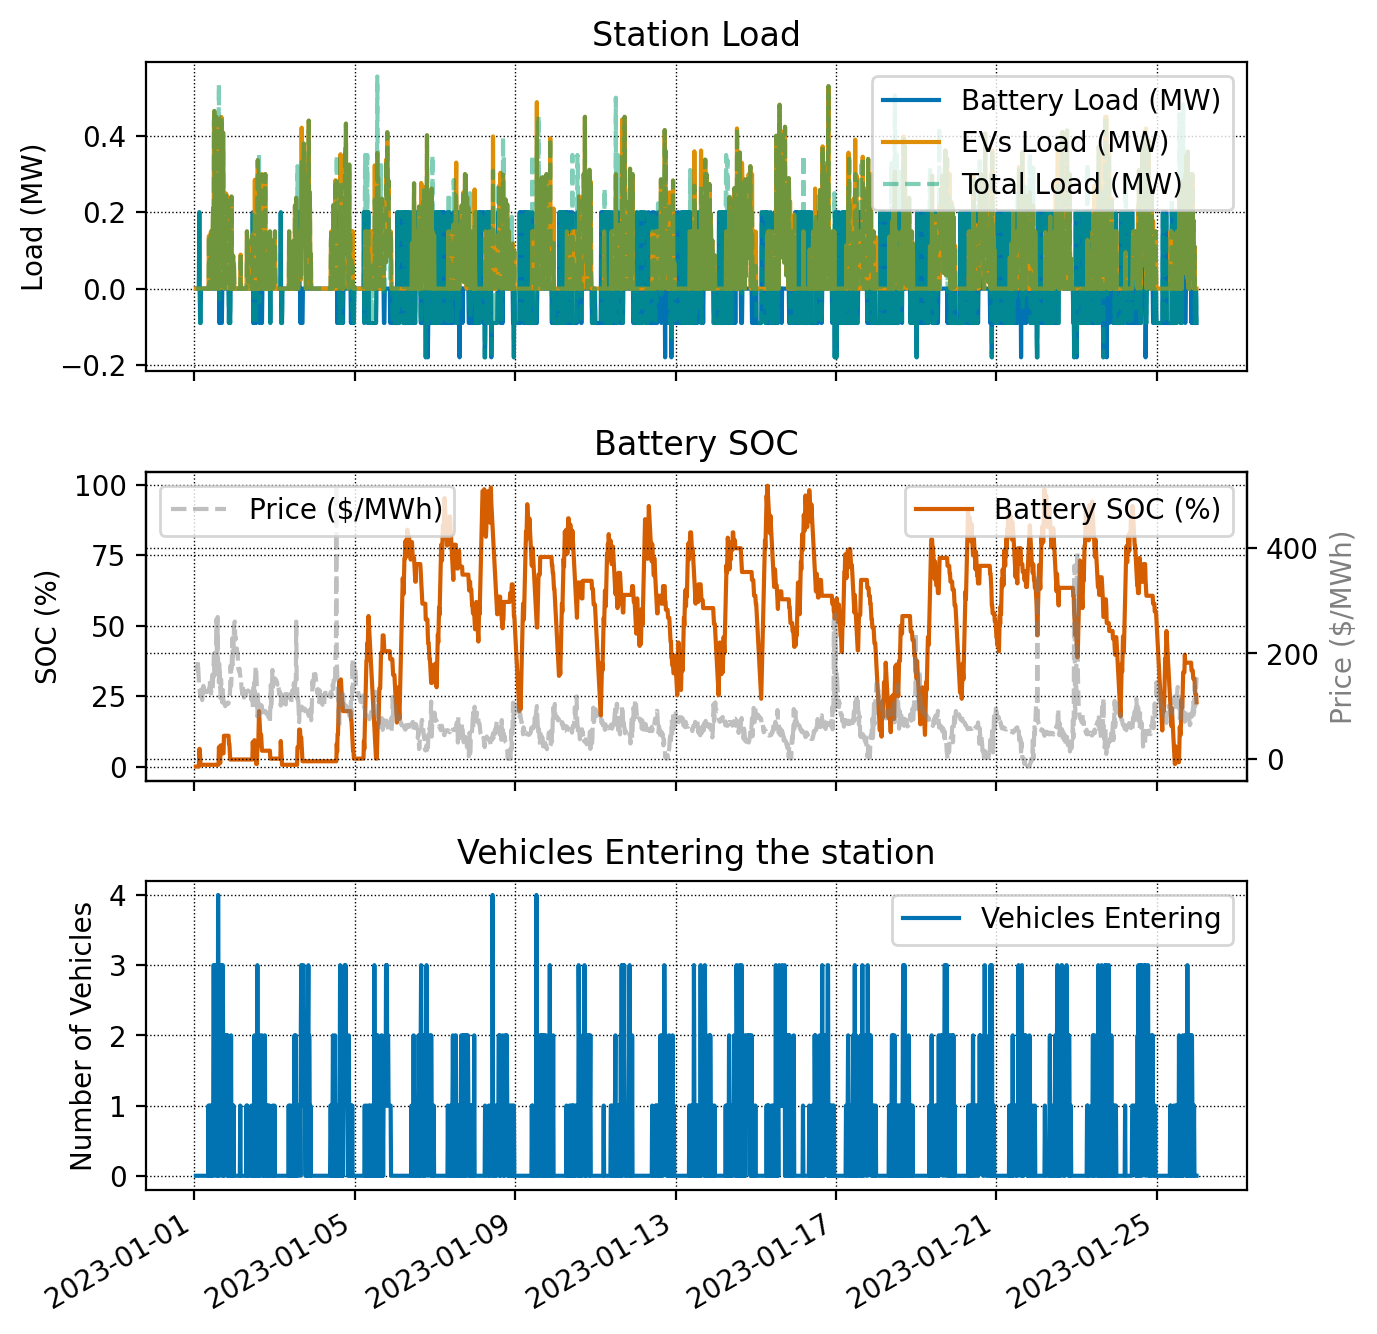

In [13]:
START, END = "2023-01-01", "2023-01-25"

viz.plotOperations(history, START, END, save_path="DQNResults/policy.png")